#### Loading libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [48]:
train = pd.read_csv('../data/train_cleaned.csv')
test = pd.read_csv('../data/test_cleaned.csv')

In [3]:
train.describe()

,ID,text_digit_cnt,title_polarity,text_polarity,ttl_wrds,char_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
count,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.0,3834.0,3834.0,3834.0,3834.0,3834.0,3834.0,3834.0
mean,1923.259520,0.059468,0.028814,0.027829,8.003652,37.941575,4.432367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1110.126876,0.285506,0.207136,0.205016,3.699936,15.551677,1.356097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,-0.800000,-0.800000,1.000000,5.000000,0.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,963.250000,0.000000,0.000000,0.000000,5.000000,27.000000,3.482143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1923.500000,0.000000,0.000000,0.000000,8.000000,36.000000,4.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2884.750000,0.000000,0.000000,0.000000,10.000000,47.000000,5.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3845.000000,6.000000,1.000000,1.000000,25.000000,132.000000,18.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.head()

,ID,Title,Domain,original_title,text_words,text_digit_cnt,clean_text_lem,clean_text_wrds,clean_text,title_polarity,...,char_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,1,what is good in a decision tree a large or a s...,Techniques,what is good in a decision tree a large or a s...,"['what', 'is', 'good', 'in', 'a', 'decision', ...",0,"['what', 'is', 'good', 'in', 'a', 'decision', ...","['good', 'decision', 'tree', 'large', 'small',...",good decision tree large small leaf size,0.221429,...,40,2.666667,0,0,0,0,0,0,0,0
1,2,training data only contains single positive label,Techniques,training data only contains single positive label,"['training', 'data', 'only', 'contains', 'sing...",0,"['training', 'data', 'only', 'contains', 'sing...","['training', 'data', 'contains', 'single', 'po...",training data contains single positive label,0.051948,...,44,5.500000,0,0,0,0,0,0,0,0
2,3,calculating percentage contribution of a negat...,Techniques,calculating percentage contribution of a negat...,"['calculating', 'percentage', 'contribution', ...",0,"['calculating', 'percentage', 'contribution', ...","['calculating', 'percentage', 'contribution', ...",calculating percentage contribution negative c...,-0.300000,...,54,6.750000,0,0,0,0,0,0,0,0
3,4,unable to open solution checker,Hackathons,unable to open solution checker,"['unable', 'to', 'open', 'solution', 'checker']",0,"['unable', 'to', 'open', 'solution', 'checker']","['unable', 'open', 'solution', 'checker']",unable open solution checker,-0.250000,...,28,4.666667,0,0,0,0,0,0,0,0
4,5,user name change,Misc,user name change,"['user', 'name', 'change']",0,"['user', 'name', 'change']","['user', 'name', 'change']",user name change,0.000000,...,16,4.000000,0,0,0,0,0,0,0,0


#### Create data for modelling

- Drop id columne
- separate label and features in training data

In [5]:
num_col = train.select_dtypes(include=np.number).columns
var_col = train.select_dtypes(exclude=np.number).columns

print(num_col)
print(var_col)

Index(['ID', 'text_digit_cnt', 'title_polarity', 'text_polarity', 'ttl_wrds',
       'char_count', 'word_density', 'punctuation_count', 'title_word_count',
       'upper_case_word_count', 'noun_count', 'verb_count', 'adj_count',
       'adv_count', 'pron_count'],
      dtype='object')
Index(['Title', 'Domain', 'original_title', 'text_words', 'clean_text_lem',
       'clean_text_wrds', 'clean_text'],
      dtype='object')


In [3]:
target_col = ['Domain']
id_col = ['ID']
ft_col = ['text_digit_cnt', 'title_polarity', 'text_polarity', 'ttl_wrds','char_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'noun_count', 'verb_count', 'adj_count','adv_count', 'pron_count']
text_ft_col = ['clean_text']

In [4]:
train_y = train[target_col]

train_id = train[id_col]
test_id = test[id_col]

train_x = train[ft_col]
test_x = test[ft_col]

train_text_x = train[text_ft_col]
test_text_x = test[text_ft_col]

#### Extract Features

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(train['clean_text'])

# transform the training and validation data using count vectorizer object
train_count_vec =  count_vect.transform(train['clean_text'])
test_count_vec =  count_vect.transform(test['clean_text'])

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(train['clean_text'])
train_tfidf_vec =  tfidf_vect.transform(train['clean_text'])
test_tfidf_vec =  tfidf_vect.transform(test['clean_text'])

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word',ngram_range = (1,2))
tfidf_vect_ngram.fit(train['clean_text'])
train_tfidf_ngram_vec =  tfidf_vect_ngram.transform(train['clean_text'])
test_tfidf_ngram_vec =  tfidf_vect_ngram.transform(test['clean_text'])

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char')
tfidf_vect_ngram_chars.fit(train['clean_text'])
train_tfidf_ngram_chars_vec =  tfidf_vect_ngram_chars.transform(train['clean_text']) 
test_tfidf_ngram_chars_vec =  tfidf_vect_ngram_chars.transform(test['clean_text']) 

In [12]:
## train_count_vec
## train_tfidf_vec
## train_tfidf_ngram_vec
## train_tfidf_ngram_chars_vec

## combinations
## train_count_vec + train_tfidf_vec
## train_count_vec + train_tfidf_ngram_vec
## train_count_vec + train_tfidf_ngram_chars_vec
print(train_count_vec.shape)
print(train_tfidf_vec.shape)
print(train_tfidf_ngram_vec.shape)
print(train_tfidf_ngram_chars_vec.shape)

(3834, 3633)
(3834, 3633)
(3834, 15516)
(3834, 36)


In [7]:
train_count_vec_df =  pd.DataFrame.sparse.from_spmatrix(train_count_vec,columns=count_vect.get_feature_names_out()).sparse.to_dense()
train_tfidf_vec_df =  pd.DataFrame.sparse.from_spmatrix(train_tfidf_vec,columns=tfidf_vect.get_feature_names_out()).sparse.to_dense()
train_tfidf_ngram_vec_df =  pd.DataFrame.sparse.from_spmatrix(train_tfidf_ngram_vec,columns=tfidf_vect_ngram.get_feature_names_out()).sparse.to_dense()
train_tfidf_ngram_chars_vec_df =  pd.DataFrame.sparse.from_spmatrix(train_tfidf_ngram_chars_vec,columns=tfidf_vect_ngram_chars.get_feature_names_out()).sparse.to_dense()

test_count_vec_df =  pd.DataFrame.sparse.from_spmatrix(test_count_vec,columns=count_vect.get_feature_names_out()).sparse.to_dense()
test_tfidf_vec_df =  pd.DataFrame.sparse.from_spmatrix(test_tfidf_vec,columns=tfidf_vect.get_feature_names_out()).sparse.to_dense()
test_tfidf_ngram_vec_df =  pd.DataFrame.sparse.from_spmatrix(test_tfidf_ngram_vec,columns=tfidf_vect_ngram.get_feature_names_out()).sparse.to_dense()
test_tfidf_ngram_chars_vec_df =  pd.DataFrame.sparse.from_spmatrix(test_tfidf_ngram_chars_vec,columns=tfidf_vect_ngram_chars.get_feature_names_out()).sparse.to_dense()

In [8]:
del train_count_vec
del train_tfidf_vec
del train_tfidf_ngram_vec
del train_tfidf_ngram_chars_vec
del train
del test
#del embeddings_index
del train_text_x
del test_text_x

In [20]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ["In", "Out", "exit", "quit", "get_ipython", "ipython_vars"]

# Get a sorted list of the objects and their sizes
mem = {
    key: value
    for key, value in sorted(
        [
            (x, sys.getsizeof(globals().get(x)))
            for x in dir()
            if not x.startswith("_") and x not in sys.modules and x not in ipython_vars
        ],
        key=lambda x: x[1],
        reverse=True,
    )
}
print(sum(mem.values())/ 1e6)
print(mem)

1004.253931
{'train_tfidf_ngram_vec_df': 475906912, 'test_tfidf_ngram_vec_df': 204687232, 'train_count_vec_df': 111431536, 'train_tfidf_vec_df': 111431536, 'test_count_vec_df': 47926696, 'test_tfidf_vec_df': 47926696, 'embeddings_index': 1922480, 'train_tfidf_ngram_chars_vec_df': 1104352, 'test_tfidf_ngram_chars_vec_df': 475072, 'train_x': 429568, 'train_text_x': 365786, 'train_y': 249481, 'test_x': 184848, 'test_text_x': 158041, 'train_id': 30832, 'test_id': 13352, 'values': 2552, 'line': 2307, 'CountVectorizer': 1688, 'TfidfVectorizer': 1688, 'ft_col': 168, 'open': 152, 'np': 72, 'pd': 72, 'plt': 72, 'sns': 72, 'id_col': 64, 'target_col': 64, 'text_ft_col': 64, 'count_vect': 56, 'test_count_vec': 56, 'test_tfidf_ngram_chars_vec': 56, 'test_tfidf_ngram_vec': 56, 'test_tfidf_vec': 56, 'tfidf_vect': 56, 'tfidf_vect_ngram': 56, 'tfidf_vect_ngram_chars': 56, 'i': 28}


#### Defining Accuracy functions

In [9]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

def accuracy_cal(act,pred):
    print('confusion matrix: ',confusion_matrix(act,pred))
    print('Accuracy Score: ',accuracy_score(act,pred))
    print('F1 Score: ',f1_score(act,pred))
    print('Recall Score: ',recall_score(act,pred))
    print('Precision Score: ',precision_score(act,pred))

In [10]:
## Used in below models to visualize the precision recall tradeoff and auc score and roc curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.legend()
    plt.xlabel('Threshold')
    plt.show()

def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Posiitve Rate")
    plt.show()

def plot_prt_roc(tr,scores):
    precisions,recalls,thresholds = precision_recall_curve(tr,scores)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, threshold = roc_curve(tr,scores)
    plot_roc_curve(fpr,tpr)
    plt.show()  

#### Load model libraries

In [11]:
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/home/apurvasij/anaconda3/envs/av_query/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#### Trying a bunch of classifiers using cross validation

In [12]:
models = {'SGDClassifier':SGDClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC()
         }

def Fit_Score(models, train_x, train_y):
    np.random.seed(77)
    model_scores = {}
    for name, model in models.items():
        print(name)
        model_scores[name] = {"cv_acc": np.mean(cross_val_score(model, train, train_y, cv=5, scoring="accuracy"))}
    return model_scores

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
## checking with only raw score

# for train in [train_count_vec_df,train_tfidf_vec_df,train_tfidf_ngram_vec_df,train_tfidf_ngram_chars_vec_df]:

train = train_tfidf_ngram_chars_vec_df
Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
print(pd.DataFrame(Scores.values(), Scores.keys()))

train = train_count_vec_df
Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
print(pd.DataFrame(Scores.values(), Scores.keys()))

train = train_tfidf_vec_df
Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
print(pd.DataFrame(Scores.values(), Scores.keys()))

train = train_tfidf_ngram_vec_df
Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
print(pd.DataFrame(Scores.values(), Scores.keys()))

SGDClassifier
RandomForestClassifier
LogisticRegression
SVC
                          cv_acc
SGDClassifier           0.514078
RandomForestClassifier  0.546165
LogisticRegression      0.534953
SVC                     0.554772
SGDClassifier
RandomForestClassifier
LogisticRegression
SVC
                          cv_acc
SGDClassifier           0.634063
RandomForestClassifier  0.655453
LogisticRegression      0.672402
SVC                     0.648666
SGDClassifier
RandomForestClassifier
LogisticRegression
SVC
                          cv_acc
SGDClassifier           0.663534
RandomForestClassifier  0.665360
LogisticRegression      0.667445
SVC                     0.652578
SGDClassifier
RandomForestClassifier
LogisticRegression
SVC
                          cv_acc
SGDClassifier           0.667185
RandomForestClassifier  0.659099
LogisticRegression      0.632235
SVC                     0.611630


In [51]:
## ## checking with only first type of comb
models = {'SGDClassifier':SGDClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression()
          }


# train_df1 = pd.concat([train_x, train_count_vec_df])
# train_df2 = pd.concat([train_x, train_tfidf_vec_df])
# train_df3 = pd.concat([train_x, train_tfidf_ngram_vec_df])
# train_df4 = pd.concat([train_x, train_tfidf_ngram_chars_vec_df])

for train in [train_count_vec_df,train_tfidf_ngram_vec_df]:
    train = pd.concat([train_x, train], axis=1)
    Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
    print(pd.DataFrame(Scores.values(), Scores.keys()))

SGDClassifier
RandomForestClassifier
LogisticRegression
                          cv_acc
SGDClassifier           0.523739
RandomForestClassifier  0.658323
LogisticRegression      0.624411
SGDClassifier
RandomForestClassifier
LogisticRegression
                          cv_acc
SGDClassifier           0.366511
RandomForestClassifier  0.647106
LogisticRegression      0.515912


In [52]:
##check with second type of comb
#train_df2_comb1 = pd.concat([train_x, train_count_vec_df, train_tfidf_vec_df])
#train_df3_comb2 = pd.concat([train_x, train_count_vec_df, train_tfidf_ngram_vec_df])
#train_df4_comb3 = pd.concat([train_x, train_count_vec_df, train_tfidf_ngram_chars_vec_df])

for train in [train_tfidf_ngram_vec_df]:
    train = pd.concat([train_x, train_count_vec_df, train], axis=1)
    Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
    print(pd.DataFrame(Scores.values(), Scores.keys()))


#test_df1 = pd.concat([test_x, test_count_vec_df])
#test_df2 = pd.concat([test_x, test_tfidf_vec_df])
#test_df3 = pd.concat([test_x, test_tfidf_ngram_vec_df])
#test_df4 = pd.concat([test_x, test_tfidf_ngram_chars_vec_df])
#test_df2_comb1 = pd.concat([test_x, test_count_vec_df, test_tfidf_vec_df])
#test_df3_comb2 = pd.concat([test_x, test_count_vec_df, test_tfidf_ngram_vec_df])
#test_df4_comb3 = pd.concat([test_x, test_count_vec_df, test_tfidf_ngram_chars_vec_df])

SGDClassifier
RandomForestClassifier
LogisticRegression
                          cv_acc
SGDClassifier           0.630149
RandomForestClassifier  0.654928
LogisticRegression      0.625979


In [54]:
for train in [train_tfidf_ngram_vec_df]:
    train = pd.concat([train_count_vec_df, train], axis=1)
    Scores = Fit_Score(models=models, train_x = train, train_y=train_y)
    print(pd.DataFrame(Scores.values(), Scores.keys()))


SGDClassifier
RandomForestClassifier
LogisticRegression
                          cv_acc
SGDClassifier           0.639018
RandomForestClassifier  0.656753
LogisticRegression      0.672924


In [19]:
train_x = pd.concat([train_count_vec_df, train_tfidf_ngram_vec_df], axis=1)
test_x = pd.concat([test_count_vec_df, test_tfidf_ngram_vec_df], axis=1)

In [17]:
import pickle

In [21]:
models = {'SGDClassifier':SGDClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression()
          }

for name, model in models.items():
    model.fit(train_x,train_y)
    pickle.dump(model, open(''.join(['../models/',name,'_raw1.pkl']), 'wb')) 
    y_pred = pd.DataFrame(model.predict(test_x),columns=['Domain'])
    pd.concat([test_id,y_pred],axis=1).to_csv(''.join(["../submissions/",name,'_raw1.csv']),index=False)

#### Pick top 5 algorithm for hypertuning and ensemble based on accuracy and best type of data comb

- SVC
- gradient boosting classifier
- SGD Classifier
- logistic
- random forest

In [22]:
models = {'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SGDClassifier':SGDClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'SVC': SVC()
         }

#### Creating multiple logistic regressions for each label and taking highest 

In [14]:
train_y_enc = pd.DataFrame(pd.get_dummies(train_y, columns = ['Domain']))
train_y_enc.head

<bound method NDFrame.head of       Domain_Career  Domain_Hackathons  Domain_Misc  Domain_Other  \
0                 0                  0            0             0   
1                 0                  0            0             0   
2                 0                  0            0             0   
3                 0                  1            0             0   
4                 0                  0            1             0   
...             ...                ...          ...           ...   
3829              0                  0            0             0   
3830              0                  0            0             0   
3831              0                  0            0             0   
3832              0                  0            0             0   
3833              0                  0            0             0   

      Domain_Resources  Domain_Techniques  Domain_Tools  
0                    0                  1             0  
1                    0   

In [15]:
train_y.value_counts()

Domain    
Techniques    1852
Tools          917
Career         437
Hackathons     262
Resources      170
Other          122
Misc            74
dtype: int64

In [20]:
targets = ['Domain_Career','Domain_Hackathons','Domain_Misc','Domain_Other','Domain_Resources', 'Domain_Techniques', 'Domain_Tools']
new_sub = test_id
new_test = train_id

for target in targets:
    print(target)
    model = LogisticRegression().fit(train_x,train_y_enc[target])
    train_pred = pd.DataFrame(model.predict(train_x),columns=[target])
    new_test = pd.concat([new_test,train_pred],axis=1)
    pickle.dump(model, open(''.join(['../models/',target,'_lg1.pkl']), 'wb')) 
    y_pred = pd.DataFrame(model.predict_proba(test_x),columns=[target])
    new_sub = pd.concat([new_sub,y_pred],axis=1)
    
new_test = pd.concat([new_test,train_y],axis=1)

Domain_Career
Domain_Hackathons
Domain_Misc
Domain_Other
Domain_Resources
Domain_Techniques
Domain_Tools


In [21]:
new_test.head()

,ID,Domain_Career,Domain_Hackathons,Domain_Misc,Domain_Other,Domain_Resources,Domain_Techniques,Domain_Tools,Domain
0,1,0,0,0,0,0,1,0,Techniques
1,2,0,0,0,0,0,1,0,Techniques
2,3,0,0,0,0,0,1,0,Techniques
3,4,0,1,0,0,0,0,0,Hackathons
4,5,0,0,0,0,0,0,0,Misc


In [22]:
new_test['test_n'] = new_test.apply(lambda x: x.Domain_Career + x.Domain_Hackathons+x.Domain_Misc+x.Domain_Other+x.Domain_Resources + x.Domain_Techniques+x.Domain_Tools, axis = 1)

In [26]:
new_test[new_test['test_n'] == 2]

,ID,Domain_Career,Domain_Hackathons,Domain_Misc,Domain_Other,Domain_Resources,Domain_Techniques,Domain_Tools,Domain,test_n
38,39,0,0,0,0,1,1,0,Resources,2
227,228,0,0,0,0,0,1,1,Tools,2
730,732,0,1,0,0,0,1,0,Techniques,2
1154,1159,0,0,0,0,0,1,1,Techniques,2
1295,1301,0,1,0,0,0,1,0,Techniques,2
1783,1790,0,0,0,0,0,1,1,Tools,2
2062,2069,0,0,0,0,1,1,0,Resources,2
2083,2090,0,0,0,0,0,1,1,Techniques,2
2084,2091,0,0,0,0,0,1,1,Techniques,2
2125,2132,0,1,0,0,0,1,0,Hackathons,2


In [50]:
model = LogisticRegression().fit(train_x,train_y_enc['Domain_Career'])  
print(model.predict_proba(train_x)[3811])

model = LogisticRegression().fit(train_x,train_y_enc['Domain_Hackathons'])  
print(model.predict_proba(train_x)[3811])

model = LogisticRegression().fit(train_x,train_y_enc['Domain_Techniques'])  
print(model.predict_proba(train_x)[3811])

[0.98107764 0.01892236]
[0.47072504 0.52927496]
[0.37021749 0.62978251]


In [49]:
train_y.loc[3811]

Domain    Techniques
Name: 3811, dtype: object

In [52]:
model.predict_proba(train_x)[:,-1][3811]

0.6297825069968411

In [53]:
targets = ['Domain_Career','Domain_Hackathons','Domain_Misc','Domain_Other','Domain_Resources', 'Domain_Techniques', 'Domain_Tools']
new_sub = test_id
new_test = train_id

for target in targets:
    print(target)
    model = LogisticRegression().fit(train_x,train_y_enc[target])
    train_pred = pd.DataFrame(model.predict_proba(train_x)[:,-1],columns=[target])
    new_test = pd.concat([new_test,train_pred],axis=1)
    pickle.dump(model, open(''.join(['../models/',target,'_lg2.pkl']), 'wb')) 
    y_pred = pd.DataFrame(model.predict_proba(test_x)[:,-1],columns=[target])
    new_sub = pd.concat([new_sub,y_pred],axis=1)
    
new_test = pd.concat([new_test,train_y],axis=1)

Domain_Career
Domain_Hackathons
Domain_Misc
Domain_Other
Domain_Resources
Domain_Techniques
Domain_Tools


In [54]:
new_test['max_prob'] = new_test.apply(lambda x: max(x.Domain_Career, x.Domain_Hackathons,x.Domain_Misc,x.Domain_Other,x.Domain_Resources,x.Domain_Techniques,x.Domain_Tools), axis = 1)

In [55]:
new_test.head()

,ID,Domain_Career,Domain_Hackathons,Domain_Misc,Domain_Other,Domain_Resources,Domain_Techniques,Domain_Tools,Domain,max_prob
0,1,0.008609,0.007007,0.006744,0.006395,0.012231,0.890920,0.136327,Techniques,0.890920
1,2,0.084041,0.021883,0.011179,0.016876,0.036646,0.816902,0.053996,Techniques,0.816902
2,3,0.023986,0.017657,0.010948,0.026446,0.027363,0.930514,0.028960,Techniques,0.930514
3,4,0.010623,0.716950,0.018110,0.036664,0.038241,0.032964,0.163950,Hackathons,0.716950
4,5,0.050601,0.025060,0.323230,0.016429,0.026014,0.258787,0.203839,Misc,0.323230


In [56]:
new_sub['max_prob'] = new_sub.apply(lambda x: max(x.Domain_Career, x.Domain_Hackathons,x.Domain_Misc,x.Domain_Other,x.Domain_Resources,x.Domain_Techniques,x.Domain_Tools), axis = 1)
new_sub.head()

,ID,Domain_Career,Domain_Hackathons,Domain_Misc,Domain_Other,Domain_Resources,Domain_Techniques,Domain_Tools,max_prob
0,3846,0.039196,0.040643,0.016418,0.020145,0.245397,0.240395,0.123759,0.245397
1,3847,0.002101,0.007729,0.003573,0.008309,0.014553,0.453945,0.578558,0.578558
2,3848,0.004879,0.115637,0.004816,0.007687,0.007415,0.701843,0.110551,0.701843
3,3849,0.004483,0.174898,0.014635,0.028323,0.016542,0.533227,0.107324,0.533227
4,3850,0.013315,0.117677,0.010190,0.015596,0.014997,0.018610,0.948941,0.948941


In [67]:
conditions = [(new_sub['Domain_Career'] == new_sub['max_prob']),
             (new_sub['Domain_Hackathons'] == new_sub['max_prob']),
             (new_sub['Domain_Misc'] == new_sub['max_prob']),
             (new_sub['Domain_Other'] == new_sub['max_prob']),
             (new_sub['Domain_Resources'] == new_sub['max_prob']),
             (new_sub['Domain_Techniques'] == new_sub['max_prob']),
             (new_sub['Domain_Tools'] == new_sub['max_prob'])
            ]

# create a list of the values we want to assign for each condition
values = ['Career',
        'Hackathons',
        'Misc',
        'Other',
        'Resources',
        'Techniques',
        'Tools']

# create a new column and use np.select to assign values to it using our lists as arguments
new_sub['Domain'] = np.select(conditions, values)

In [68]:
new_sub.head()

,ID,Domain_Career,Domain_Hackathons,Domain_Misc,Domain_Other,Domain_Resources,Domain_Techniques,Domain_Tools,max_prob,Domain
0,3846,0.039196,0.040643,0.016418,0.020145,0.245397,0.240395,0.123759,0.245397,Resources
1,3847,0.002101,0.007729,0.003573,0.008309,0.014553,0.453945,0.578558,0.578558,Tools
2,3848,0.004879,0.115637,0.004816,0.007687,0.007415,0.701843,0.110551,0.701843,Techniques
3,3849,0.004483,0.174898,0.014635,0.028323,0.016542,0.533227,0.107324,0.533227,Techniques
4,3850,0.013315,0.117677,0.010190,0.015596,0.014997,0.018610,0.948941,0.948941,Tools


In [69]:
new_sub[['ID','Domain']].to_csv('../submissions/submission_voting.csv',index=False)

In [ ]:
## to do 
# targets = ['Domain_Career','Domain_Hackathons','Domain_Misc','Domain_Other','Domain_Resources', 'Domain_Techniques', 'Domain_Tools']
# new_sub = test_id
# 
# for target in targets:
#     print(target)
#     model = clf.fit(train_x,train_y_enc[target])
#     pickle.dump(model, open(''.join(['../models/',target,'_lg2.pkl']), 'wb')) 
#     y_pred = pd.DataFrame(model.predict_proba(test_x)[:,-1],columns=[target])
#     new_sub = pd.concat([new_sub,y_pred],axis=1)
#     
# new_sub['max_prob'] = new_sub.apply(lambda x: max(x.Domain_Career, x.Domain_Hackathons,x.Domain_Misc,x.Domain_Other,x.Domain_Resources,x.Domain_Techniques,x.Domain_Tools), axis = 1)
# 
# conditions = [(new_sub['Domain_Career'] == new_sub['max_prob']),
#              (new_sub['Domain_Hackathons'] == new_sub['max_prob']),
#              (new_sub['Domain_Misc'] == new_sub['max_prob']),
#              (new_sub['Domain_Other'] == new_sub['max_prob']),
#              (new_sub['Domain_Resources'] == new_sub['max_prob']),
#              (new_sub['Domain_Techniques'] == new_sub['max_prob']),
#              (new_sub['Domain_Tools'] == new_sub['max_prob'])
#             ]
# 
# # create a list of the values we want to assign for each condition
# values = ['Career',
#         'Hackathons',
#         'Misc',
#         'Other',
#         'Resources',
#         'Techniques',
#         'Tools']
# 
# # create a new column and use np.select to assign values to it using our lists as arguments
# new_sub['Domain'] = np.select(conditions, values)
# new_sub.to_csv('../data/rf.csv',index=False)

#### Final Output on Public Leaderboard

*Using Clean Data* 
- Logistic Regression performs best with 0.4297 score
- SGD performs second best with 0.4284 score
- RF perform worst with 0.3935 score

*Using Orignal Data* 
- SGD performs best with 0.434 score
- LG performs second best with 0.4284 score
- RF perform worst with 0.37 score


#### Final Ranking

- Rank 12/300 (top 4%) on public/private leaderboard (As of 26Mar23, Launched on 1Jan23)

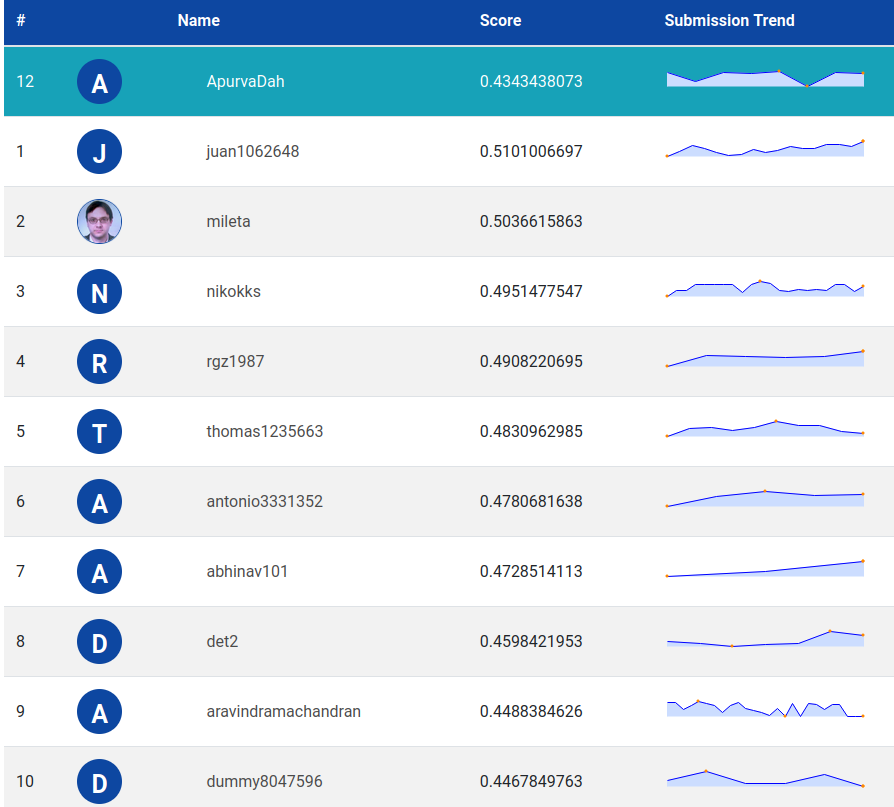